In qeusto notebook analizzeremo come la somma di tante semplici ReLU functions tra di loro sia in grado di dare vita a funzioni più complesse.

I paramentri delle varie ReLU (verso e slope) saranno randomici per ogni singla ReLU creata, e questo farà si di genrerare diverse funzioni randomiche ad ogni singola iterazione.


Iniziamo con l'import delle librerie utilizzate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

Definizione della funzione che restituisce randomincamente una tra le due funzioni

*   (+) ReLU 
*   (-) ReLU 

In [ ]:
def get_relu(phi_slope, x):
  return phi_slope * np.maximum(0, x)
  

def get_tanh(phi_slope, x):
    return phi_slope * np.tanh(x)


def get_sigmoid(phi_slope, x):
   
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    
    # Calculate sigmoid for positive values
    sigmoid_pos = 1.0 / (1.0 + np.exp(-x[pos_mask]))
    
    # Calculate sigmoid for negative values using the identity: sigmoid(x) = 1 - sigmoid(-x)
    sigmoid_neg = 1.0 - 1.0 / (1.0 + np.exp(x[neg_mask]))
    
    # Combine sigmoid values for positive and negative values
    sigmoid_result = np.empty_like(x)
    sigmoid_result[pos_mask] = sigmoid_pos
    sigmoid_result[neg_mask] = sigmoid_neg
    
    return phi_slope * sigmoid_result


def get_linear(phi_slope, x):
  return phi_slope*x


In [ ]:
def get_phi(phi, phi_slope, x):

    if phi == 'relu':
        return get_relu(phi_slope, x)

    elif phi == 'tanh':
        return get_tanh(phi_slope, x)

    elif phi == 'sigmoid':
        return get_sigmoid(phi_slope, x)

    elif phi == 'linear':
        return get_linear(phi_slope, x)

    elif phi == 'random':

      phi = np.random.choice(['relu', 'tanh', 'sigmoid', 'linear'])
      #print(f'random found: using {phi}')
      return get_phi(phi, phi_slope, x)

    else:
        raise ValueError(f"Unsupported activation function: {phi}")

Funzione che crea 'n' parametri che verranno utilizzati successivamente per la creazione di 'n' funzioni ReLU utilizzando la funzione di creazione ReLU di cui sopra.

Gli 'n' parametri creati dalla funzione faranno in modo di creare 'n' ReLU equidistanti tra loro di una distanza 'distance' con un coefficiente angolare sempre diverso

In [ ]:
def get_random_params(n):
    
    params = []
    
    for i in range(n):
        
        # slope di dimensione randomica
        x_slope = np.random.uniform(low=-10, high=10)  
        
        phi_slope = np.random.uniform(low=-10, high=10)  

        b = np.random.uniform(low=-100, high=100)

        # aggiungo la traslazione tra le n funzioni

        x_slope_sign = -1 * x_slope/abs(x_slope) if x_slope != 0 else np.random.choise([-1,1])
        translation = x_slope_sign * i 
        
        params.append( (phi_slope, x_slope, translation, b) )
    
    return params


Plottiamo 5 ReLU a distanza 2 per vedere come vengono. 

**Nota** che per come la funzione di creazione delle ReLU è definita, esecuzioni diverse genereranno ReLU diverse

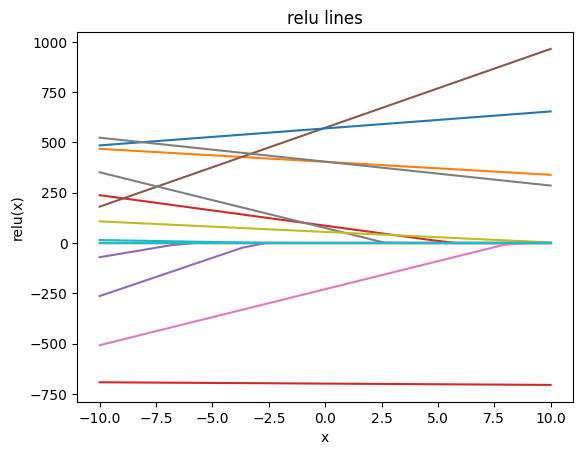

In [ ]:
n = 20

params = get_random_params(n)


x = np.linspace(-n/2, n/2, n)

phi = 'relu'


for i, (phi_slope, x_slope, translation, b) in enumerate(params):
  
  y = get_phi(phi, phi_slope, x_slope*(x + translation) + b)
  
  sum_y = sum(y)
  sign = sum_y/abs(sum_y)  if sum_y != 0 else 1

  plt.plot(x, y)



plt.xlabel('x')
plt.ylabel(f'{phi}(x)')
plt.title(f'{phi} lines')
plt.show()

# Funzione somma delle ReLU

Procediamo adesso a definire una funzione che si occuperà di creare una "funzione matematica" data dalla somma delle 'n' ReLU equidistanziate di una distanza 'distance'.

**Nota** che questa funzione rappresenta la somma delle 'n' ReLU e, data la generazione randomica delle ReLU, assumerà di volta in volta una forma diversa

In [ ]:
def get_summed_phi(x, params, phi, n):
    
    result = np.zeros_like(x)
    
    for  (phi_slope, x_slope, translation, b) in params:

        t = get_phi( phi, phi_slope ,  x_slope*(x + translation) + b)
        result += t
    
    return result

Generiaamo la funzione somma come somma di un numero 'n' di ReLu equidistanziate da un valore 'distance'

**Nota** ad ogni esecuzione, si otterrà una funzione diversa (vedi sopra)

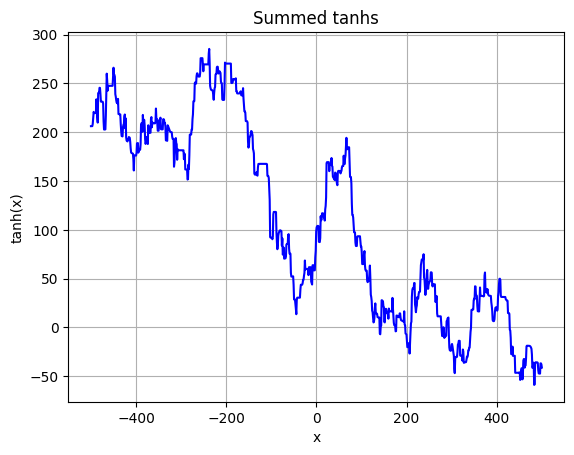

In [ ]:
def get_random_f(phi, x):

  params = get_random_params(n)

  summed_phi = get_summed_phi(x, params, phi, n)

  return summed_phi


def plot_f(f, color, name, title):
    plt.plot(x, f, color=color)
    plt.xlabel('x')
    plt.ylabel(f'{name}(x)')
    plt.title(title)
    plt.grid(True)
    plt.show()


n = 1000

phi = 'tanh'

x = np.linspace(-n/2, n/2, n)

f = get_random_f(phi, x)
plot_f(f, 'blue', phi, f'Summed {phi}s')

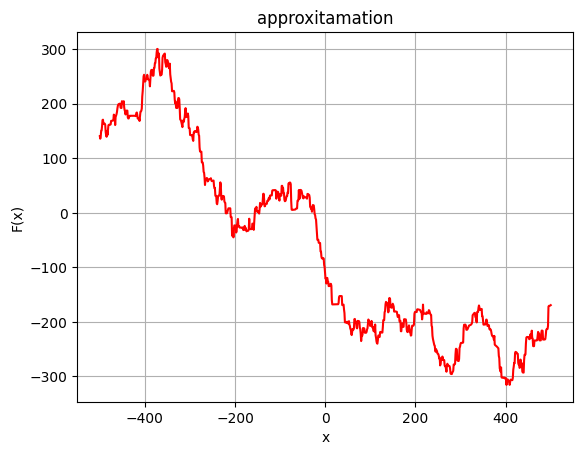

Mean Squared Error: 40166.888129418665


In [ ]:
PHI_SLOPE =[ np.random.uniform(low=-10, high=10) for _ in range(n) ]
X_SLOPE = [ np.random.uniform(low=-10, high=10) for _ in range(n) ]
B = [ np.random.uniform(low=-10, high=10) for _ in range(n) ]


SIGNS = [ -1 * X_SLOPE[i]/abs(X_SLOPE[i]) if X_SLOPE[i] != 0 else np.random.choise([-1,1]) for i in range(n) ]
TRANSLATION = [ SIGNS[i]*i for i in range(n) ]
params = [(PHI_SLOPE[i], X_SLOPE[i], TRANSLATION[i], B[i]) for i in range(0, n)]

x = np.linspace(-n/2, n/2, n)


F = get_summed_phi(x, params, phi, n)

plot_f(F, 'red', 'F', 'approxitamation')


def calculate_mse(f, F):
    squared_diff = (f - F)**2
    mse = np.mean(squared_diff)
    return mse


mse = calculate_mse(f, F)
print("Mean Squared Error:", mse)

In [ ]:
def calculate_mse(f, F):
    squared_diff = (f - F)**2
    mse = np.mean(squared_diff)
    return mse


mse = calculate_mse(f, F)
print("Mean Squared Error:", mse)

Mean Squared Error: 78814.45177219149


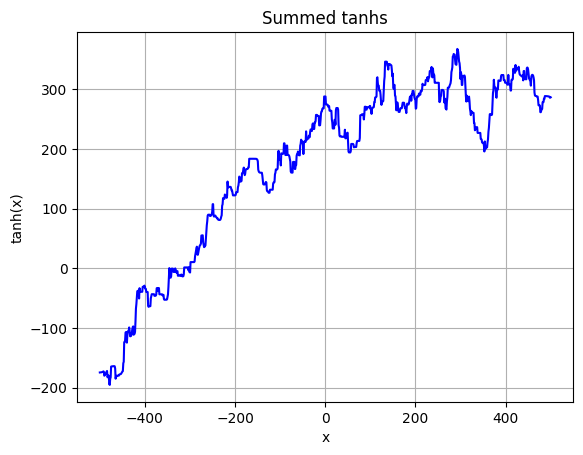

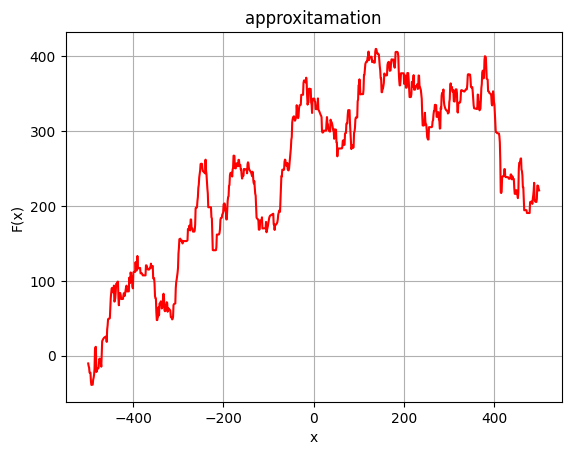

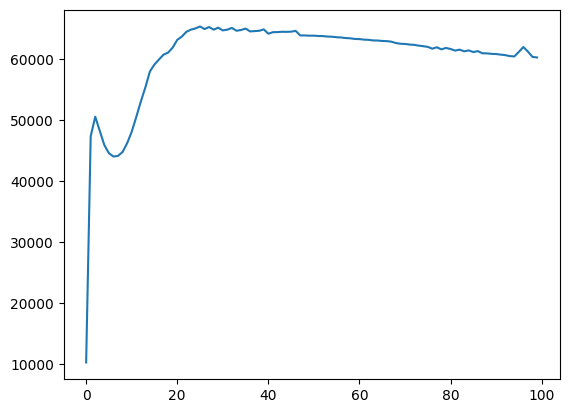

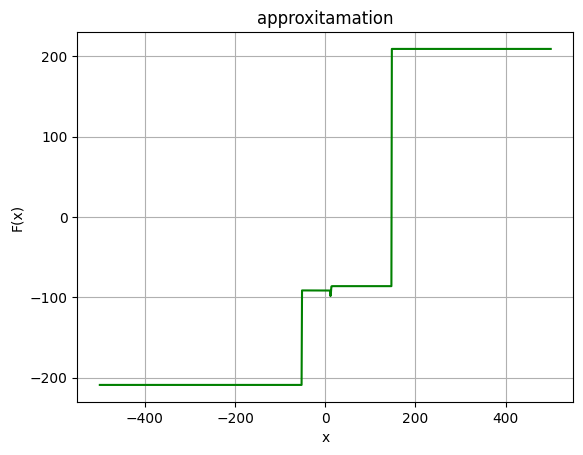

In [ ]:
n = 1000

phi = 'tanh'

x = np.linspace(-n/2, n/2, n)

f = get_random_f(phi, x)
plot_f(f, 'blue', phi, f'Summed {phi}s')


PHI_SLOPE =[ np.random.uniform(low=-10, high=10) for _ in range(n) ]
X_SLOPE = [ np.random.uniform(low=-10, high=10) for _ in range(n) ]
B = [ np.random.uniform(low=-10, high=10) for _ in range(n) ]


SIGNS = [ -1 * X_SLOPE[i]/abs(X_SLOPE[i]) if X_SLOPE[i] != 0 else np.random.choise([-1,1]) for i in range(n) ]
TRANSLATION = [ SIGNS[i]*i for i in range(n) ]
params = [(PHI_SLOPE[i], X_SLOPE[i], TRANSLATION[i], B[i]) for i in range(0, n)]

F = get_summed_phi(x, params, phi, n)
plot_f(F, 'red', 'F', 'approxitamation')




# ---------------------------------------------------------------
# ---------------------------------------------------------------



# ---------------------------------------------------------------
# ---------------------------------------------------------------


#Fn = get_summed_phi(x, params, phi, n)
plot_f(F, 'green', 'F', 'approxitamation')
plt.show()

##Creiamo una animazione 

Procediamo creando una animazione per vedere come la funzione viene composta, somma dopa somma delle singole ReLU

step 1 of 50


<ipython-input-44-b98db01a988d>:20: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0,i)


step 2 of 50
step 3 of 50
step 4 of 50
step 5 of 50
step 6 of 50
step 7 of 50
step 8 of 50
step 9 of 50
step 10 of 50
step 11 of 50
step 12 of 50
step 13 of 50
step 14 of 50
step 15 of 50
step 16 of 50
step 17 of 50
step 18 of 50
step 19 of 50
step 20 of 50
step 21 of 50
step 22 of 50
step 23 of 50
step 24 of 50
step 25 of 50
step 26 of 50
step 27 of 50
step 28 of 50


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fc7e8eb1630> (for post_execute):


KeyboardInterrupt: ignored

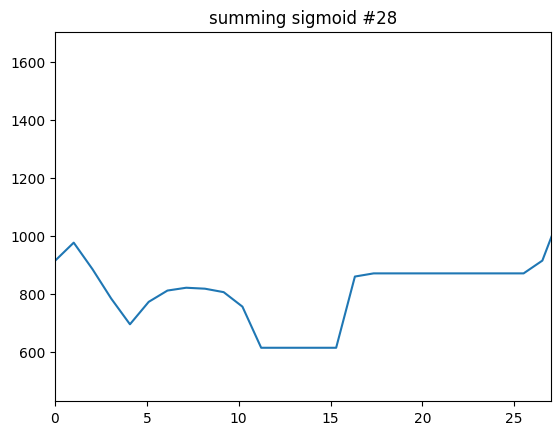

In [ ]:
#----------------------
# DA SISTEMARE
# --
# Buona parte del codice sopra è cambiato
#----------------------

def animate_summed_phi(phi, n, params, distance, frame_duration):
   
    frames = []

    

    x = np.linspace(0, distance * n, distance * n)

    result = np.zeros_like(x)

    for i in range(len(params)):

        print(f'step {i+1} of {len(params)}')
      
        result +=  get_summed_phi(x, params, phi, n, distance)


        plt.plot(x, result)

        plt.xlim(0,i)

        min_res = min(result)
        max_res = max(result)

        plt.ylim( min_res - abs(min_res*0.3) , max_res + abs(max_res*0.3))

        plt.xlabel('x')
        plt.ylabel(f'{phi}(x)')
        plt.title(f'summing {phi} #{i+1}')

        # Save the current plot as an image
        fig = plt.gcf()
        fig.canvas.draw()
        frame = np.array(fig.canvas.renderer.buffer_rgba())

        frames.append(frame)

        plt.clf()  # Clear the plot for the next iteration

    print('The gif is now ready, wait until is saved')

    # Save the frames as a GIF with specified duration
    imageio.mimsave(f'summed_{phi}s.gif', frames, duration=frame_duration)

    print('The gif has been successfully saved!')

n = 50
distance = 1
frame_duration = 0.2  # Specify the duration of each frame in seconds

params = get_random_params(n, distance)

animate_summed_phi('sigmoid', n, params, distance, frame_duration)